>Change the runtime version to 2025.07 for tensorflowjs compability

## IMPORTING THE LIBRARIES AND DATA

In [ ]:
!pip install tensorflowjs
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 405.6/475.3 MB 116.6 MB/s eta 0:00:01
ERROR: Operation cancelled by user
^C


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('emails.xlsx')
df = df.dropna(subset=['Sender', 'Subject', 'Label'])
df

,Sender,Subject,Label
0,Unstop Competitions <noreply@dare2compete.news>,Your chance to run the most powerful club on c...,Not Important
1,Medium Daily Digest <noreply@medium.com>,I Can’t Recommend The MacBook Pro To Developer...,Not Important
2,Unstop Hiring Hub <noreply@dare2compete.news>,Exciting Internship at Walter P Moore | Stipen...,Not Important
3,"""'Dean Academic Research' via B.Tech. - C S E ...",Fwd: FW: Journal publication details of VIT fo...,Not Important
4,"""'Director CO2' via B.Tech. - C S E with Spec....","Value-added program for UG, PG & Research Scho...",Not Important
...,...,...,...
4408,"""'Registrar Vellore' via All First Year Studen...",Sports facilities for the Fall Semester 2023-24,Important
4409,<no-reply@vit.ac.in>,VITian Mobile App - OTP,Important
4410,Google <no-reply@accounts.google.com>,2-Step Verification turned on,Important
4411,VIT University Vellore RemoteXs Portal <egatew...,An account for you has been created to use Rem...,Important


<Axes: xlabel='Label', ylabel='count'>

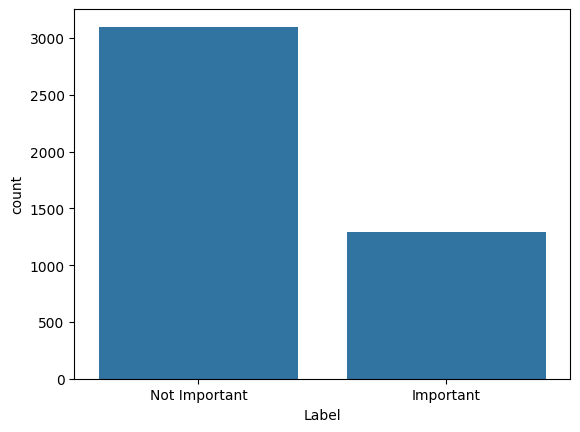

In [3]:
sns.countplot(x='Label', data = df)

## BALANCING BOTH CLASSES

In [4]:
df2 = df[df['Label']=='Important']
target,lol = df2.shape
target

1289

In [5]:
df_0 = df[df['Label']=='Important']
df_1 = df[df['Label']=='Not Important']
df_1_under = df_1.sample(target)
df_under = pd.concat([df_1_under,df_0], axis=0)
df = df_under

<Axes: xlabel='Label', ylabel='count'>

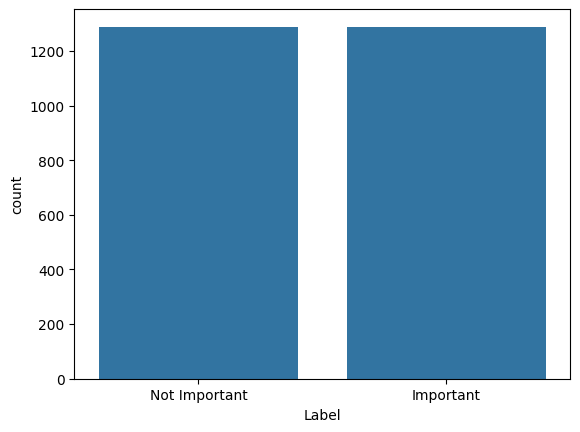

In [6]:
sns.countplot(x='Label', data = df)

## PREPROCESSING


In [9]:
df["X"] = df['Sender'].astype(str)+" "+df['Subject'].astype(str)
le = LabelEncoder()
df['y'] = le.fit_transform(df['Label'])

X = df["X"].values
y = df["y"].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
vocab_size = 5000
max_len = 50

In [15]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
x_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq,maxlen=max_len,padding='post')
x_val_pad = tf.keras.preprocessing.sequence.pad_sequences(X_val_seq,maxlen=max_len,padding='post')

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_len,),name="input_layer"),
    tf.keras.layers.Embedding(vocab_size,64,name="embedding"),
    tf.keras.layers.GlobalAveragePooling1D(name='polling'),
    tf.keras.layers.Dense(32,activation = 'relu',name="dense1"),
    tf.keras.layers.Dense(32,activation = 'relu',name="dense2"),
    tf.keras.layers.Dense(1,activation='sigmoid',name="output"),
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(x_train_pad,y_train, validation_data=(x_val_pad,y_val),epochs=15,batch_size=20)

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5948 - loss: 0.6747 - val_accuracy: 0.7579 - val_loss: 0.5569
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7581 - loss: 0.5164 - val_accuracy: 0.7772 - val_loss: 0.4600
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8178 - loss: 0.3952 - val_accuracy: 0.8354 - val_loss: 0.3567
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8880 - loss: 0.2621 - val_accuracy: 0.8741 - val_loss: 0.2840
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9141 - loss: 0.2184 - val_accuracy: 0.8475 - val_loss: 0.3303
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8939 - loss: 0.2267 - val_accuracy: 0.8596 - val_loss: 0.2964
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9214 - loss: 0.1739 - val_accuracy: 0.8717 - val_loss: 0.3141
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9294 - loss: 0.1623 - val_accuracy: 0.8717 - val_loss:

## CREATING AND TRAINING THE MODEL

## EVALUVATING THE MODEL

In [22]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
x_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq,maxlen=max_len,padding='post')

In [23]:
loss,acc = model.evaluate(x_test_pad,y_test,verbose=0)
print(f"test accuracy = {acc:.4f}")

test accuracy = 0.8663


In [24]:
y_pred = model.predict(x_test_pad)
y_pred

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


array([[2.23658327e-02],
       [2.29154233e-04],
       [1.22054685e-02],
       [2.58729863e-03],
       [7.33220344e-03],
       [9.41669475e-03],
       [1.15276070e-03],
       [9.03618485e-02],
       [6.39558792e-01],
       [1.26965507e-03],
       [4.04559784e-02],
       [9.55903292e-01],
       [9.98280883e-01],
       [9.99934733e-01],
       [9.92049694e-01],
       [9.94788229e-01],
       [9.72669601e-01],
       [9.89094377e-01],
       [9.94552612e-01],
       [3.35875113e-04],
       [1.51640119e-03],
       [3.17939557e-03],
       [2.24832678e-03],
       [7.77335942e-01],
       [1.14598800e-03],
       [9.27912831e-01],
       [9.67399895e-01],
       [3.65839839e-01],
       [1.03025110e-02],
       [7.11898494e-04],
       [2.05401137e-01],
       [4.36839074e-01],
       [9.98883128e-01],
       [1.90694228e-01],
       [2.56505026e-03],
       [9.99796927e-01],
       [1.11649707e-02],
       [4.58490802e-04],
       [1.83821134e-02],
       [9.72798109e-01],


In [25]:
y_pred = (y_pred >0.5).astype("int32")

In [26]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.8161    0.9457    0.8761       258
           1     0.9355    0.7868    0.8547       258

    accuracy                         0.8663       516
   macro avg     0.8758    0.8663    0.8654       516
weighted avg     0.8758    0.8663    0.8654       516



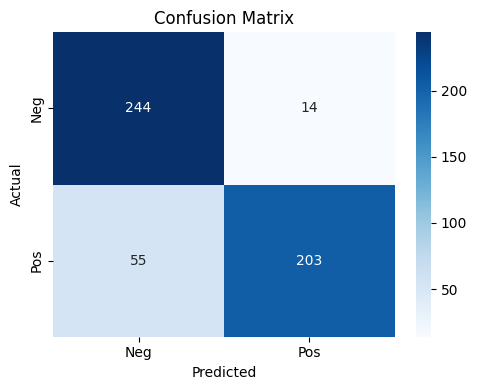

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## SAVING THE MODEL AND TOKENIZER FOR USE IN CHROME EXTENSION

In [28]:
model.save('model.h5')

In [29]:
import json
tokenizer_config = {
    "word_index": tokenizer.word_index,
    "oov_token": tokenizer.oov_token,
    "max_len": max_len
}
with open('tokenizer_vocab.json', 'w', encoding='utf-8') as f:
    json.dump(tokenizer_config, f)

In [30]:
import tensorflowjs as tfjs
import tensorflow as tf

model = tf.keras.models.load_model("model.h5")
tfjs.converters.save_keras_model(model, "temp/")

failed to lookup keras version from the file,
    this is likely a weight only file
